# Final Project Part 2: Hubble Ultra Deep Field

In [2]:
import sep
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits 

In [3]:
hdul = fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
data = hdul[0].data

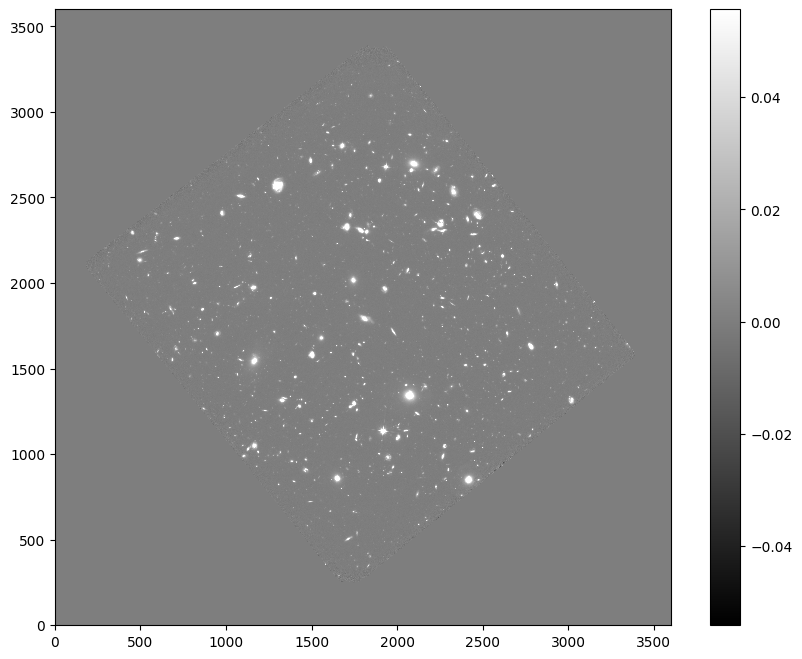

In [4]:
m, s = np.mean(data), np.std(data)
f, ax=plt.subplots(1,1,figsize=(10,8))
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig("hubble1.png")

In [5]:
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


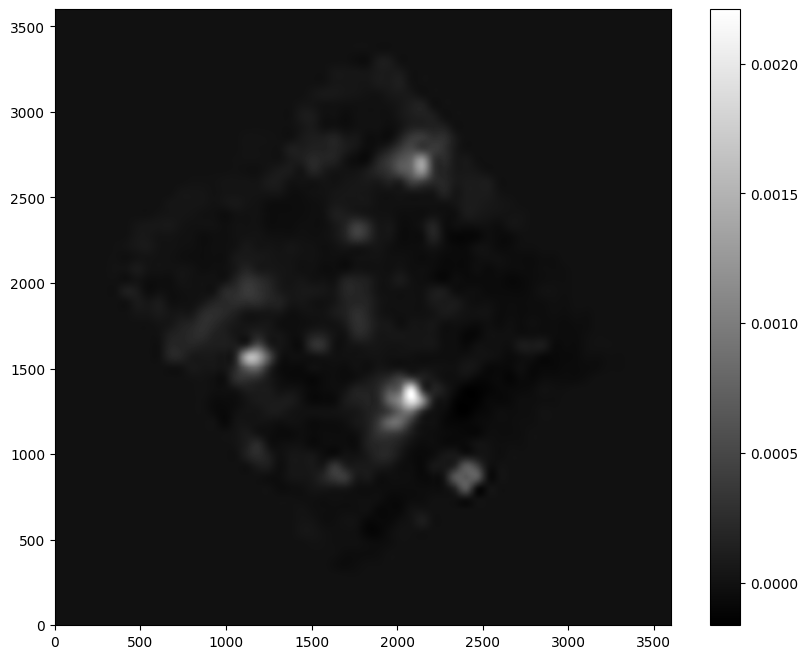

In [6]:
bkg_image = bkg.back()
f, ax=plt.subplots(1,1,figsize=(10,8))
plt.imshow(bkg_image, interpolation="nearest", cmap="gray", origin="lower")
plt.colorbar();
plt.savefig("hubble2.png")

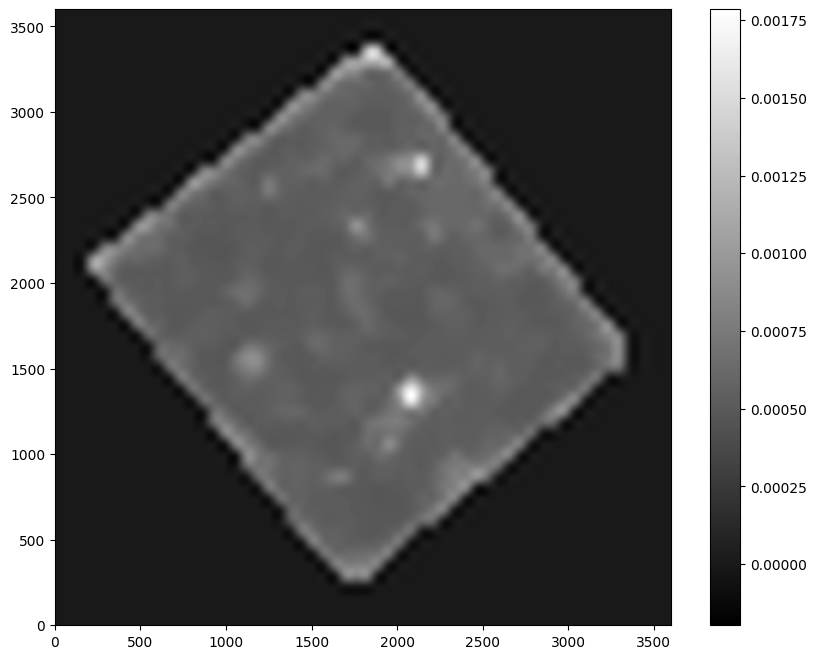

In [7]:
bkg_rms = bkg.rms()
f, ax=plt.subplots(1,1,figsize=(10,8))
plt.imshow(bkg_rms, interpolation="nearest", cmap="gray", origin="lower")
plt.colorbar();
plt.savefig("hubble3.png")

In [8]:
data_sub = data - bkg
objects = sep.extract(data_sub, 2.3, err=bkg.globalrms)

In [9]:
len(objects)

5739

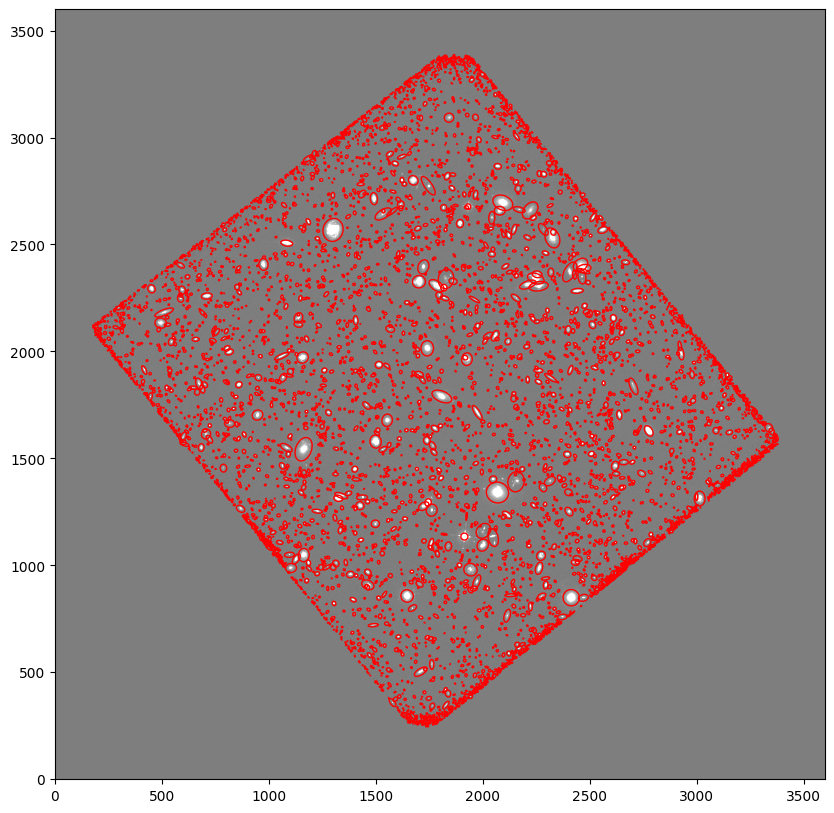

In [10]:
from matplotlib.patches import Ellipse

f, ax=plt.subplots(1,1,figsize=(10,10))
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig("hubble4.png")

In [11]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031349 +/- 0.177081
object 1: flux = 0.030740 +/- 0.175353
object 2: flux = -0.009543 +/- 0.002867
object 3: flux = 0.028194 +/- 0.167935
object 4: flux = 0.010736 +/- 0.103654
object 5: flux = 0.086093 +/- 0.293430
object 6: flux = 0.047767 +/- 0.218574
object 7: flux = 0.010265 +/- 0.101357
object 8: flux = 0.027488 +/- 0.165821
object 9: flux = 0.009351 +/- 0.096743


C:\Users\isaia\AppData\Local\Temp\ipykernel_6280\3834654910.py:2: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(flux), bins=100, edgecolor="black")


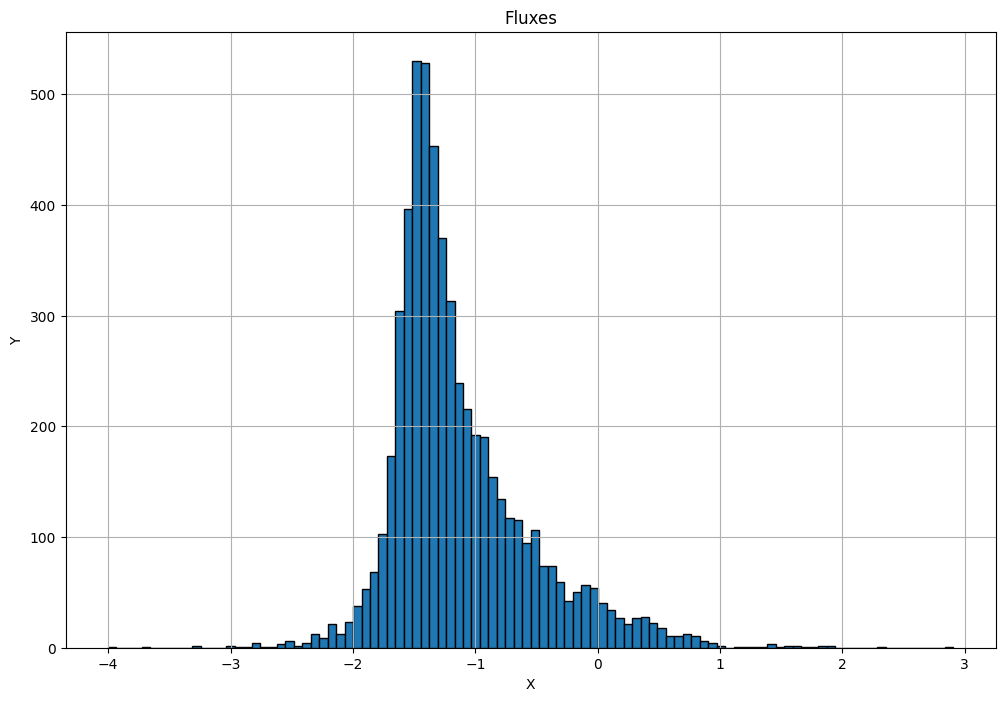

In [25]:
f, ax=plt.subplots(1,1,figsize=(12,8))
plt.hist(np.log10(flux), bins=100, edgecolor="black")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid("True")
plt.title("Fluxes")
plt.show()

In [20]:
deviation_fluxes = np.std(flux)
mean_fluxes = np.mean(flux)
median_fluxes = np.median(flux)

print("Standard Deviation:", deviation_fluxes)
print("Mean:", mean_fluxes)
print("Median:", median_fluxes)

Standard Deviation: 11.339099402272476
Mean: 0.5388263327968961
Median: 0.05071112645906395


# 3-color False Image 

In [21]:
fdataA = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
fdataB = "hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
fdataC = "hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"

#read in data 
hdu_2 = fits.open(fdataA)
hdu_3 = fits.open(fdataB)
hdu_4 = fits.open(fdataC)

#get the image data
data_2 = hdu_2[0].data
data_3 = hdu_3[0].data
data_4 = hdu_4[0].data

In [22]:
def rescale_image(data):
    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vplmin = m/2
    vpmin = np.log10(vplmin)
    vpmax = np.log10(m * 100.)
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp,vpmin,vpmax

In [23]:
data_2_res, d2min, d2max = rescale_image(data_2)
data_3_res, d3min, d3max = rescale_image(data_3)
data_4_res, d4min, d4max = rescale_image(data_4)

data_2_res[data_2_res<d2min] = d2min
data_2_res[data_2_res>d2max] = d2max
data_3_res[data_3_res<d3min] = d3min
data_3_res[data_3_res>d3max] = d3max
data_4_res[data_4_res<d4min] = d4min
data_4_res[data_4_res>d4max] = d4max

rgb = np.zeros((data_2_res.shape[0], data_2_res.shape[1], 3))
rgb[:,:,0] = (data_2_res-d2min)/(d2max-d2min)
rgb[:,:,1] = (data_3_res-d3min)/(d3max-d3min)
rgb[:,:,2] = (data_4_res-d4min)/(d4max-d4min)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


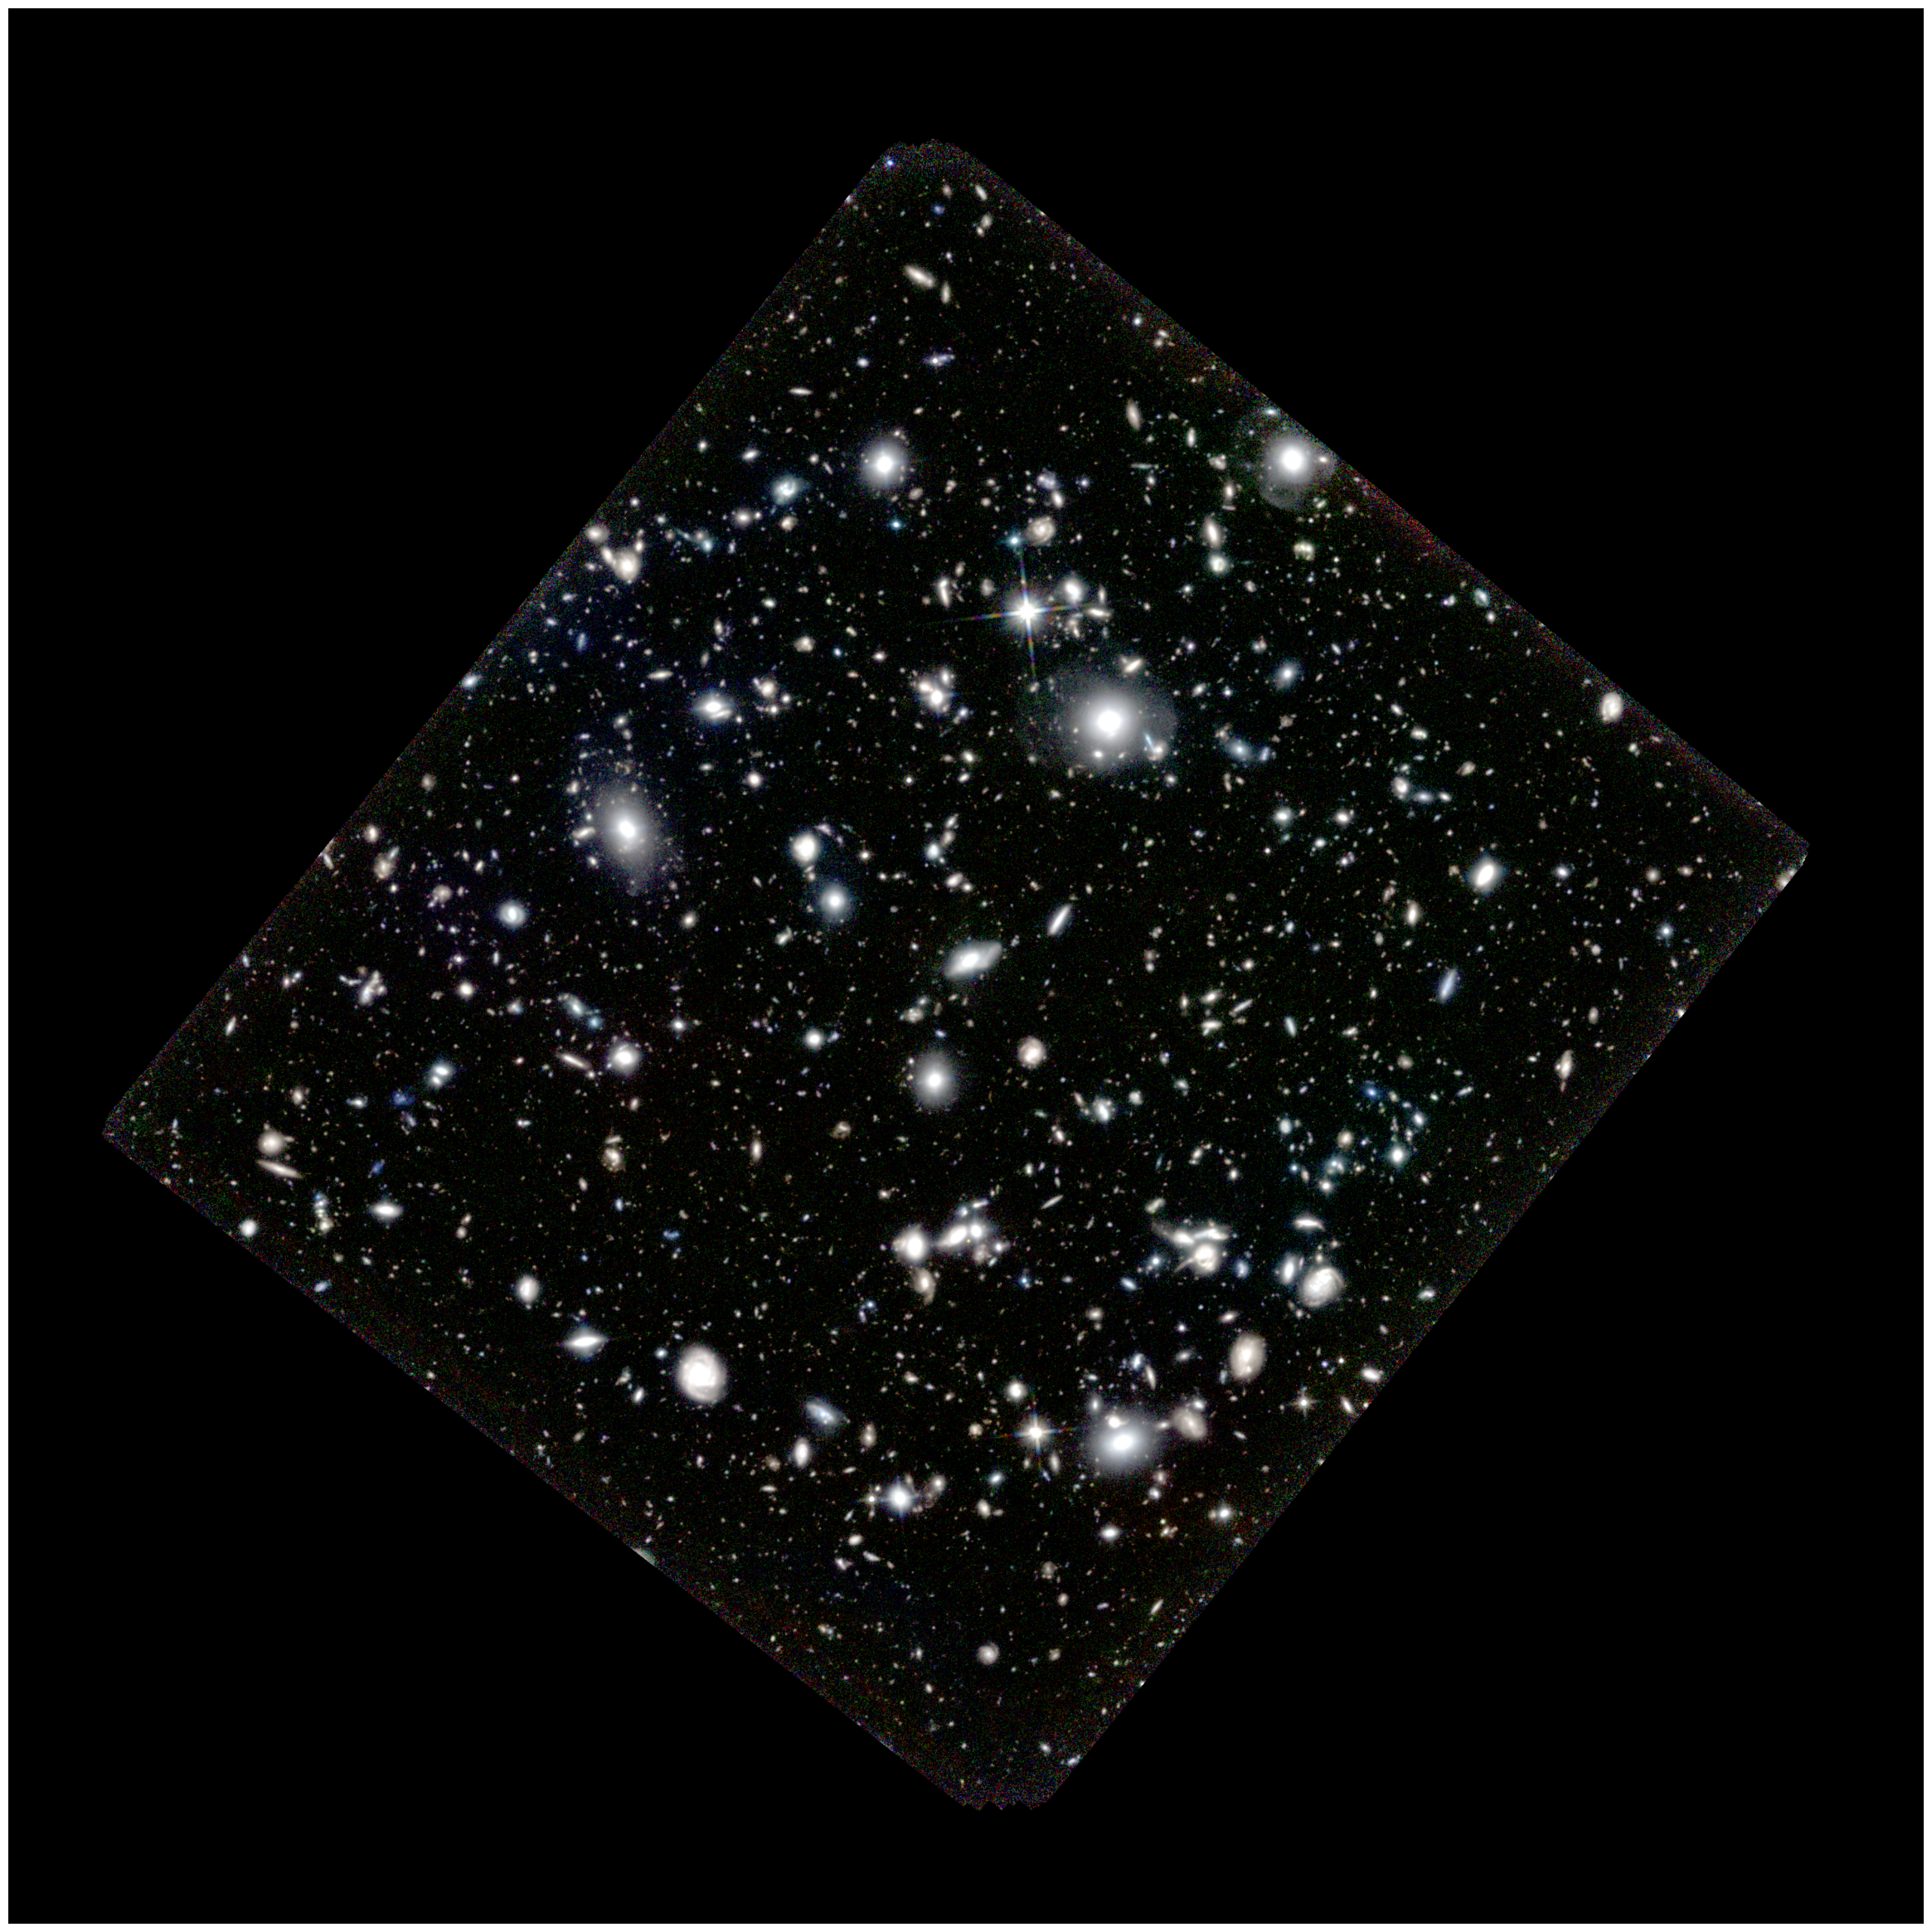

In [24]:
f,ax=plt.subplots(1,1,figsize=(30,30))
ax.axis("off")
ax.imshow(rgb)
plt.savefig("finalproject.png",bbox_inches="tight",pad_inches=0,dpi=600)